In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

data = pd.read_csv('February 19.csv', index_col=0)


Start off with the correlation matrix to understand the relationship between the different variables.

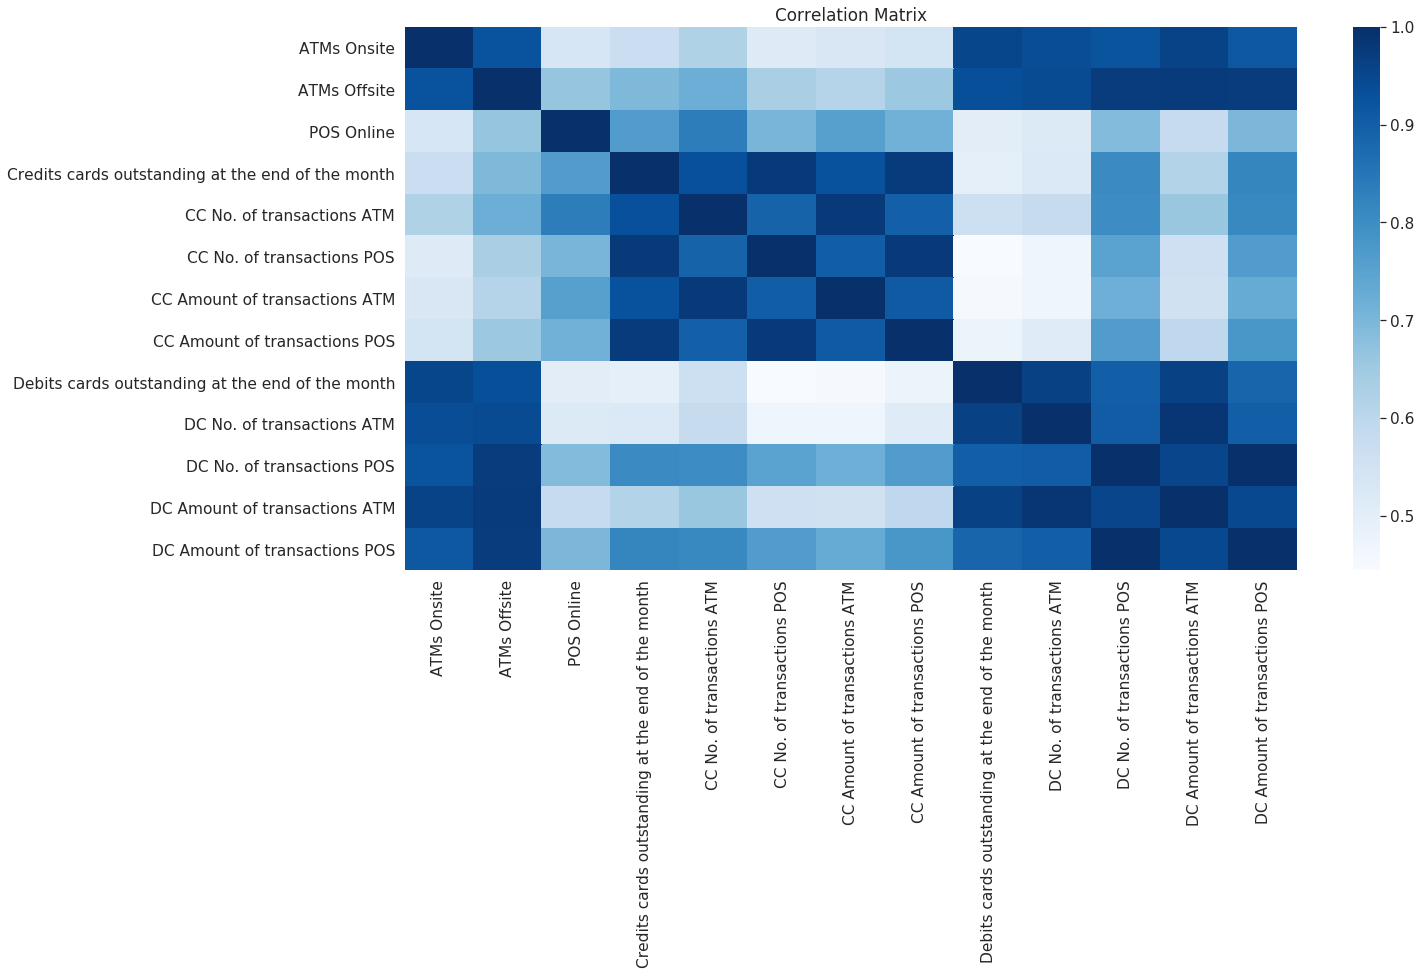

In [75]:
corr = data.corr()

plt.figure(figsize=(20, 10))

sns.set(font_scale=1.4)
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="Blues")
plt.title("Correlation Matrix")

plt.show()

This clearly shows that debit card transactions and no. of ATMs highly correlate. This makes sense as the bank with the maximum no. of debit card holders will have the maximum customer base, hence resulting in the highest no. of transactions and the highest no. of ATMs.



An interesting feature to note is that credit card transactions correlate (~ 0.75) with debit card POS transactions. This happens because credit cards are mostly used for POS transactions, in restaurants, shopping malls, etc., and rarely for ATM transactions.

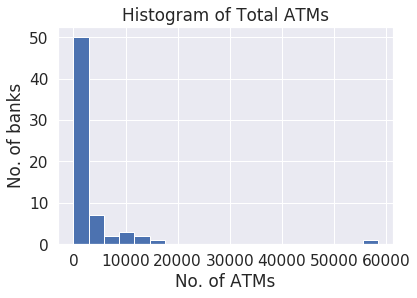

In [76]:
# Calculate total no. of ATMs

data["Total ATMs"] = data["ATMs Onsite"] + data["ATMs Offsite"] 

plt.hist(data["Total ATMs"], bins=20)
plt.xlabel("No. of ATMs")
plt.ylabel("No. of banks")
plt.title("Histogram of Total ATMs")
plt.show()

Majority of the banks have < 5000 ATMs.

The one outlier is State Bank Of India with ~ 58000 ATMs, which is the largest bank of India.

The data is highly skewed.

In [77]:
print(data["Total ATMs"].mean())

print(np.percentile(data["Total ATMs"], [0, 25, 50, 75, 100]))

3073.3636363636365
[    0.     113.75  1100.    2600.25 58376.  ]


In [78]:
# Z scaling because the data in different columns varies a lot from each other.

d_ = data.copy()
d_ = d_.drop('Bank Name', axis=1)

d_ = d_.apply(zscore)

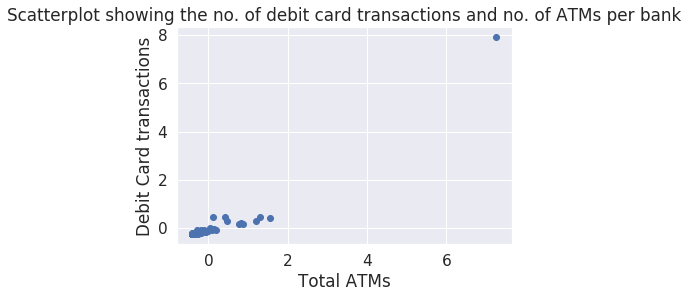

In [79]:
plt.scatter(d_['Total ATMs'], d_['DC No. of transactions ATM'])
plt.title("Scatterplot showing the no. of debit card transactions and no. of ATMs per bank")
plt.xlabel("Total ATMs")
plt.ylabel("Debit Card transactions")
plt.show()

The outlier is State Bank Of India. This plot can't be viewed very well, so another plot with the value of SBI removed is made.


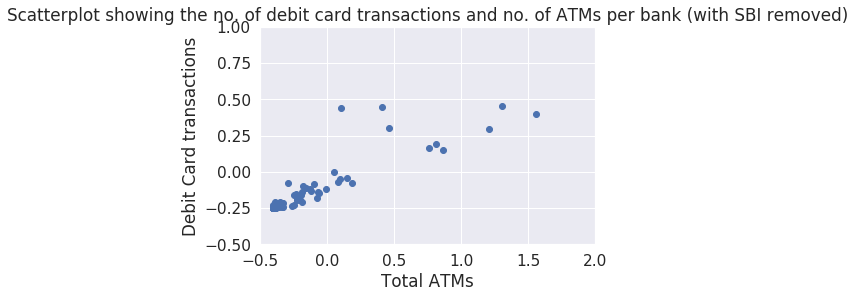

In [80]:
plt.scatter(d_['Total ATMs'], d_['DC No. of transactions ATM'])
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 1)
plt.title("Scatterplot showing the no. of debit card transactions and no. of ATMs per bank (with SBI removed)")
plt.xlabel("Total ATMs")
plt.ylabel("Debit Card transactions")
plt.show()

The relationship between the 2 variables is almost linear, the bank with a high no. of ATMs experiences a high no. of debit card transactions.

However, there are a few banks with less no. of ATMs with a high no. of debit card transactions.

To learn more about this situation, the no. of transactions per ATM for a specific bank are calculated.

In [81]:
# Finding the no. of transactions per atm for different banks

data['trans_per_atm'] = 0

for i in range(len(data)):

    if data['Total ATMs'][i] !=0 :
        data['trans_per_atm'][i] = data['DC No. of transactions ATM'][i] / data['Total ATMs'][i]
        
    else:
        data['trans_per_atm'][i] = 0

/home/ankita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ankita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


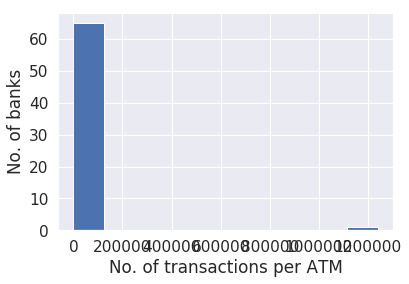

In [82]:
plt.hist(data['trans_per_atm'])
plt.xlabel("No. of transactions per ATM")
plt.ylabel("No. of banks")
plt.show()

In [83]:
print(data['trans_per_atm'].mean())

print(np.percentile(data['trans_per_atm'], [25, 50, 75]))

22010.257575757576
[1079.75 2281.   3685.5 ]


The mean comes out to be a value which is far above the 75th percentile.
This happens because of the one value that is ~1200000. 

The histogram also doesn't help much in understanding the situation.

We divide the dataset into 2 parts - one with all the points lying below the 75th percentile and the other with all the points lying above.

In [84]:
d_below_75P = data[data['trans_per_atm'] < 3685]

d_above_75P = data[data['trans_per_atm'] > 3685]

In [85]:
print(len(d_below_75P))

d_below_75P

49


,Bank Name,ATMs Onsite,ATMs Offsite,POS Online,Credits cards outstanding at the end of the month,CC No. of transactions ATM,CC No. of transactions POS,CC Amount of transactions ATM,CC Amount of transactions POS,Debits cards outstanding at the end of the month,DC No. of transactions ATM,DC No. of transactions POS,DC Amount of transactions ATM,DC Amount of transactions POS,Total ATMs,trans_per_atm
1,ANDHRA BANK,3025,773,15895,297282,14808,523048,74,1288,28048189,9846798,5858733,32749,7162,3798,2592
2,BANK OF BARODA,6430,3247,51960,216885,8515,526791,32,1156,59918420,19719888,10904078,84197,12860,9677,2037
4,BANK OF MAHARASHTRA,1314,556,3105,0,0,0,0,0,5085031,6772706,3983391,24071,2867,1870,3621
5,CANARA BANK,4769,4107,20800,356237,42990,588560,222,1196,36820396,20462769,10170485,86751,12766,8876,2305
6,CENTRAL BANK OF INDIA,3081,1086,3379,93220,2187,142782,9,313,18976200,10239076,5238091,41314,6080,4167,2457
7,CORPORATION BANK,2359,658,161588,110149,1826,135947,8,323,13024108,6659907,3533072,27109,4114,3017,2207
8,DENA BANK,1221,292,5342,0,0,0,0,0,5401680,2967788,1680293,7705,2153,1513,1961
10,INDIAN OVERSEAS BANK,2946,511,19750,57753,851,82894,3,162,16279422,12500117,4249000,51104,5590,3457,3615
11,ORIENTAL BANK OF COMMERCE,2342,283,8408,0,0,0,0,0,11067454,5097189,3172071,22382,3702,2625,1941
12,PUNJAB AND SIND BANK,1154,48,1066,0,0,0,0,0,2025337,1249067,327481,5210,558,1202,1039


49 out of 66 banks have the no. of transactions per ATM below the 75th percentile value.

This dataframe comprises of mostly the regional banks like Karnataka Bank, Punjab and Sind Bank, etc. and small finance banks.

A lot of the payments bank also lie in this section as they don't have ATMs. 

Popular private banks like Axis Bank, ICICI Bank, HDFC Bank, etc. are also a part of this dataframe. This could be a  result of the no. of ATMs being at par with the no. of transactions taking place, resulting in a lower fraction.

N. B. - To know more about small finance and payments banks, head to the README.

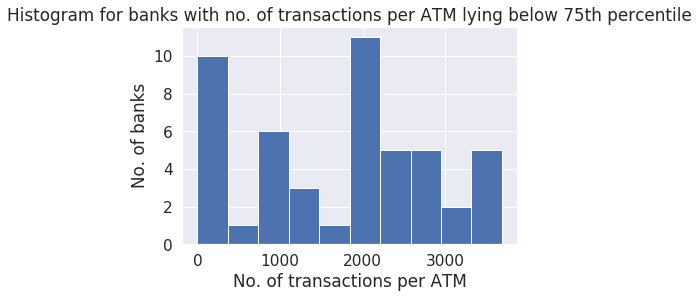

In [86]:
plt.hist(d_below_75P['trans_per_atm'])
plt.title("Histogram for banks with no. of transactions per ATM lying below 75th percentile")
plt.xlabel("No. of transactions per ATM")
plt.ylabel("No. of banks")
plt.show()

If we don't consider the 1st bar which corresponds to the value 0, the distribution seems to follow some sort of bimodal distribution which becomes approximately constant after the 2nd mode, except for one class.

In [87]:
print(len(d_above_75P))

d_above_75P

17


,Bank Name,ATMs Onsite,ATMs Offsite,POS Online,Credits cards outstanding at the end of the month,CC No. of transactions ATM,CC No. of transactions POS,CC Amount of transactions ATM,CC Amount of transactions POS,Debits cards outstanding at the end of the month,DC No. of transactions ATM,DC No. of transactions POS,DC Amount of transactions ATM,DC Amount of transactions POS,Total ATMs,trans_per_atm
0,ALLAHABAD BANK,631,200,3176,0,0,0,0,0,6049046,8736133,2893368,20881,2870,831,10512
3,BANK OF INDIA,2596,3558,64884,184049,22048,287734,122,716,59139931,34343155,8217880,63170,8315,6154,5580
9,INDIAN BANK,3135,740,10591,87102,2656,123776,15,264,18579046,34072269,6063928,60591,6508,3875,8792
16,UNION BANK OF INDIA,3831,2748,50692,46567,3612,192100,18,485,16180686,27121255,4217910,76017,5865,6579,4122
20,STATE BANK OF INDIA,25560,32816,579508,7998808,135768,22340028,522,85527,326078311,401232064,98839407,998075,133178,58376,6873
22,BANDHAN BANK LTD,481,0,26045,0,0,0,0,0,2789018,1939588,795328,7188,1107,481,4032
27,FEDERAL BANK LTD,1179,489,9716,0,0,0,0,0,5480333,7455366,4050566,36918,5309,1668,4469
30,IDFC Bank Limited,107,6,1789,0,0,0,0,0,1429815,2113952,1251968,7225,1128,113,18707
32,JAMMU AND KASHMIR BANK,728,557,17070,137750,8186,194113,27,764,3767846,5036588,828070,23544,2195,1285,3919
38,TAMILNAD MERCANTILE BANK LTD,472,680,4663,18253,2386,41790,10,155,1352578,4474609,489313,18269,705,1152,3884


The datapoint with ~12L transactions per ATM is PayTM payments bank, which has only 1 ATM but 1.2L transactions per month. This is because payments banks treat all the accounts on their platform as virtual debit cards, and hence, any transaction that take place online through them counts as a debit card transaction.

For further analysis, this datapoint needs to be removed from the dataframe.

The most popular government banks like SBI, Allahabad Bank, etc. lie here. 

Few banks like Standard Chartered Bank, HSBC Bank are present in this dataframe as the no. of their ATMs is quite low, resulting in a larger fraction.

16


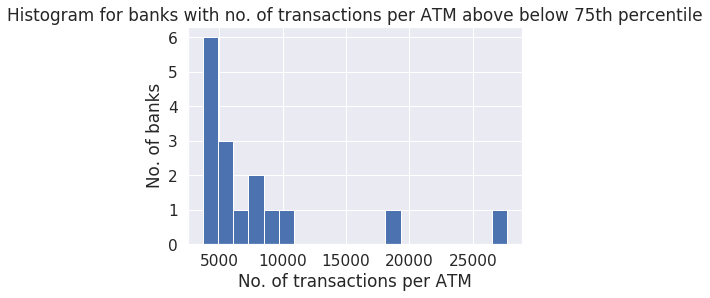

In [88]:
d_above_75P = d_above_75P.drop(d_above_75P.index[13])
print(len(d_above_75P))

plt.hist(d_above_75P['trans_per_atm'], bins=20)
plt.title("Histogram for banks with no. of transactions per ATM above below 75th percentile")
plt.xlabel("No. of transactions per ATM")
plt.ylabel("No. of banks")
plt.show()

The histogram seems to follow an exponential distribution, where the no. of banks with high no. of transactions per ATM falls rapidly.

Now consider the banks which have the most no. of ATMs, the datapoints which lie above the 75th percentile of the Total no. of ATMs

In [89]:
max_ATMs = data[data['Total ATMs'] > 2600]

max_ATMs

,Bank Name,ATMs Onsite,ATMs Offsite,POS Online,Credits cards outstanding at the end of the month,CC No. of transactions ATM,CC No. of transactions POS,CC Amount of transactions ATM,CC Amount of transactions POS,Debits cards outstanding at the end of the month,DC No. of transactions ATM,DC No. of transactions POS,DC Amount of transactions ATM,DC Amount of transactions POS,Total ATMs,trans_per_atm
1,ANDHRA BANK,3025,773,15895,297282,14808,523048,74,1288,28048189,9846798,5858733,32749,7162,3798,2592
2,BANK OF BARODA,6430,3247,51960,216885,8515,526791,32,1156,59918420,19719888,10904078,84197,12860,9677,2037
3,BANK OF INDIA,2596,3558,64884,184049,22048,287734,122,716,59139931,34343155,8217880,63170,8315,6154,5580
5,CANARA BANK,4769,4107,20800,356237,42990,588560,222,1196,36820396,20462769,10170485,86751,12766,8876,2305
6,CENTRAL BANK OF INDIA,3081,1086,3379,93220,2187,142782,9,313,18976200,10239076,5238091,41314,6080,4167,2457
7,CORPORATION BANK,2359,658,161588,110149,1826,135947,8,323,13024108,6659907,3533072,27109,4114,3017,2207
9,INDIAN BANK,3135,740,10591,87102,2656,123776,15,264,18579046,34072269,6063928,60591,6508,3875,8792
10,INDIAN OVERSEAS BANK,2946,511,19750,57753,851,82894,3,162,16279422,12500117,4249000,51104,5590,3457,3615
11,ORIENTAL BANK OF COMMERCE,2342,283,8408,0,0,0,0,0,11067454,5097189,3172071,22382,3702,2625,1941
13,PUNJAB NATIONAL BANK,5332,3919,63465,333089,7410,558175,33,1180,72673656,21710308,11828088,97235,15911,9251,2346


All the major well known banks of India are also the ones with the most no. of ATMs which is expected.